In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from a CSV file
hyper_tension_df = pd.read_csv("hyper_tension_processed.csv")

# Display the first 15 rows of the DataFrame to inspect the data
hyper_tension_df.head(15)

,DUPERSID,SEX,RACETHX,HIBPDX,HIBPAGED,BPMLDX,CHDDX,CHOLDX,STRKDX,EMPST31,MNHLTH31,ACTLIM31,DIABDX_M18,MIDX,FAMINC19,INSCOV19,RXNUM,OBDRV19,PERWT19F,TOTTCH19
0,2320005102,1,2,1,71.0,1,2,2,1,4.0,4,2,2,2,0.0,2,2,1,5356.640305,489
1,2320012102,2,2,1,65.0,1,2,1,2,4.0,1,2,1,2,87411.0,2,3,4,2196.551655,8427
2,2320019104,1,1,1,39.0,1,2,2,2,1.0,1,2,1,2,121260.0,1,2,15,5040.383330,85889
3,2320025101,2,2,1,85.0,1,2,2,2,4.0,4,1,2,2,34260.0,1,6,5,8634.920459,201964
4,2320029101,2,2,1,85.0,1,2,1,2,4.0,3,2,2,2,54585.0,1,6,6,9977.292468,44709
5,2320032101,1,3,1,37.0,1,2,2,2,1.0,3,2,2,2,115991.0,1,3,2,6739.858963,691
6,2320035103,2,1,1,38.0,1,2,2,2,4.0,5,1,2,2,46240.0,2,1,47,0.000000,47781
7,2320038101,1,2,1,55.0,1,1,1,2,1.0,2,2,2,2,226327.0,1,1,0,11337.349880,48578
8,2320044101,2,2,1,70.0,1,1,2,2,4.0,3,1,2,2,46883.0,2,4,18,12098.869950,83949
9,2320049101,1,2,1,25.0,1,2,2,2,1.0,1,2,2,2,108597.0,1,3,6,14170.566100,11659


In [3]:
print(hyper_tension_df.shape) ## show the number of rows and columns

(5341, 20)


In [4]:
## 1 indicates Yes, 2 indicates No, and -1 indicates Inapplicable.

hyper_tension_df["HIBPDX"].value_counts()

HIBPDX
1    5308
2      33
Name: count, dtype: int64

In [5]:
## Create a mask, which is a sequence of boolean values (True or False). 
## True indicates that each row (or column) meets the specified condition.
## False indicates that each row (or column) do not meets the specified condition.

print(hyper_tension_df["HIBPDX"] == 1)

0       True
1       True
2       True
3       True
4       True
        ... 
5336    True
5337    True
5338    True
5339    True
5340    True
Name: HIBPDX, Length: 5341, dtype: bool


In [6]:
hyper_tension_yes_mask = ( hyper_tension_df["HIBPDX"] == 1 )

In [7]:
# The next is to create subsets of samples having hypertension or not
hyper_tension = hyper_tension_df[hyper_tension_yes_mask]
hyper_tension.head()

,DUPERSID,SEX,RACETHX,HIBPDX,HIBPAGED,BPMLDX,CHDDX,CHOLDX,STRKDX,EMPST31,MNHLTH31,ACTLIM31,DIABDX_M18,MIDX,FAMINC19,INSCOV19,RXNUM,OBDRV19,PERWT19F,TOTTCH19
0,2320005102,1,2,1,71.0,1,2,2,1,4.0,4,2,2,2,0.0,2,2,1,5356.640305,489
1,2320012102,2,2,1,65.0,1,2,1,2,4.0,1,2,1,2,87411.0,2,3,4,2196.551655,8427
2,2320019104,1,1,1,39.0,1,2,2,2,1.0,1,2,1,2,121260.0,1,2,15,5040.383330,85889
3,2320025101,2,2,1,85.0,1,2,2,2,4.0,4,1,2,2,34260.0,1,6,5,8634.920459,201964
4,2320029101,2,2,1,85.0,1,2,1,2,4.0,3,2,2,2,54585.0,1,6,6,9977.292468,44709


In [8]:
hyper_tension_no_mask = ( hyper_tension_df["HIBPDX"] == 2 )
# The next is to create subsets of samples as per having hypertension or not
no_hyper_tension = hyper_tension_df[hyper_tension_no_mask]
no_hyper_tension.head()

,DUPERSID,SEX,RACETHX,HIBPDX,HIBPAGED,BPMLDX,CHDDX,CHOLDX,STRKDX,EMPST31,MNHLTH31,ACTLIM31,DIABDX_M18,MIDX,FAMINC19,INSCOV19,RXNUM,OBDRV19,PERWT19F,TOTTCH19
340,2321331102,2,2,2,48.469854,1,2,2,2,1.0,1,2,2,2,213990.0,1,0,0,34159.086420,765
554,2322245101,2,1,2,48.469854,1,2,2,2,1.0,2,2,2,2,15000.0,2,1,0,13062.603100,0
600,2322432101,1,2,2,48.469854,1,2,2,2,4.0,1,1,2,2,38905.0,2,0,0,11076.964520,365
1048,2324124106,2,2,2,48.469854,1,2,2,2,4.0,2,2,2,2,116771.0,2,2,0,20065.236880,606
1111,2324366102,1,1,2,48.469854,1,2,2,2,1.0,3,2,2,2,33000.0,2,4,1,6007.216977,24785


In [49]:
## Sample 100 instances for each case

sample_with_hyper_tension = hyper_tension.sample(n=100, random_state=1)
print(sample_with_hyper_tension.head())
print(sample_with_hyper_tension.shape)


        DUPERSID  SEX  RACETHX  HIBPDX  HIBPAGED  BPMLDX  CHDDX  CHOLDX  \
708   2322890101    1        1       1      71.0       1      2       1   
4428  2466471102    1        2       1      50.0       1      2       2   
4005  2464958101    1        2       1      64.0       1      2       1   
4805  2467801102    1        2       1      68.0       1      2       1   
5148  2469037101    1        2       1      64.0       1      2       1   

      STRKDX  EMPST31  MNHLTH31  ACTLIM31  DIABDX_M18  MIDX  FAMINC19  \
708        1      4.0         4         1           1     2   13632.0   
4428       2      1.0         1         2           2     2  237250.0   
4005       2      4.0         1         2           2     2  102924.0   
4805       2      4.0         4         2           1     1   12084.0   
5148       2      4.0         2         2           2     1       0.0   

      INSCOV19  RXNUM  OBDRV19      PERWT19F  TOTTCH19  
708          2      3       35   1399.837060     3329

In [50]:
## Sample 100 instances for each case

sample_with_no_hyper_tension = no_hyper_tension.sample(n=100, random_state=1, replace=True)
print(sample_with_no_hyper_tension.head())
print(sample_with_no_hyper_tension.shape)


        DUPERSID  SEX  RACETHX  HIBPDX   HIBPAGED  BPMLDX  CHDDX  CHOLDX  \
1786  2326812101    1        1       2  48.469854       1      2       1   
1216  2324744101    1        1       2  48.469854       1      2       2   
1260  2324897105    1        1       2  48.469854       1      2       2   
1540  2326005101    1        4       2  48.469854       1      2       2   
1144  2324522101    1        2       2  48.469854       1      2       2   

      STRKDX  EMPST31  MNHLTH31  ACTLIM31  DIABDX_M18  MIDX  FAMINC19  \
1786       2      1.0         2         2           2     2   59000.0   
1216       2      4.0         1         2           2     2   58569.0   
1260       2      1.0         1         2           2     2   85000.0   
1540       2      1.0         3         2           2     2   70400.0   
1144       2      1.0         1         2           2     2  156000.0   

      INSCOV19  RXNUM  OBDRV19      PERWT19F  TOTTCH19  
1786         3      0        0   6252.444291   

# HIBPDX vs TOTTCH19

In [11]:
sample_with_hyper_tension["TOTTCH19"].describe()

count       100.000000
mean      27708.360000
std       52966.339629
min           0.000000
25%        2337.250000
50%        6091.500000
75%       35371.000000
max      393393.000000
Name: TOTTCH19, dtype: float64

In [12]:
print("Mean",sample_with_hyper_tension["TOTTCH19"].mean())
print("Median",sample_with_hyper_tension["TOTTCH19"].median())
print("Max",sample_with_hyper_tension["TOTTCH19"].max())
print("Min",sample_with_hyper_tension["TOTTCH19"].min())

Mean 27708.36
Median 6091.5
Max 393393
Min 0


In [13]:
## calculate range
rg = sample_with_hyper_tension["TOTTCH19"].max() - sample_with_hyper_tension["TOTTCH19"].min() 
print(rg)

393393


In [14]:
## calculate interquartile range
iqr = sample_with_hyper_tension["TOTTCH19"].quantile(0.75) - sample_with_hyper_tension["TOTTCH19"].quantile(0.25) 
print(iqr)

33033.75


In [15]:
sample_with_no_hyper_tension["TOTTCH19"].describe()

count      100.000000
mean      9167.200000
std      18277.840857
min          0.000000
25%        548.000000
50%       1613.000000
75%       9397.250000
max      79814.000000
Name: TOTTCH19, dtype: float64

In [16]:
print("Mean",sample_with_no_hyper_tension["TOTTCH19"].mean())
print("Median",sample_with_no_hyper_tension["TOTTCH19"].median())
print("Max",sample_with_no_hyper_tension["TOTTCH19"].max())
print("Min",sample_with_no_hyper_tension["TOTTCH19"].min())

Mean 9167.2
Median 1613.0
Max 79814
Min 0


In [17]:
## calculate range
rg = sample_with_no_hyper_tension["TOTTCH19"].max() - sample_with_no_hyper_tension["TOTTCH19"].min() 
print(rg)

79814


In [18]:
## calculate interquartile range
iqr = sample_with_no_hyper_tension["TOTTCH19"].quantile(0.75) - sample_with_no_hyper_tension["TOTTCH19"].quantile(0.25) 
print(iqr)

8849.25


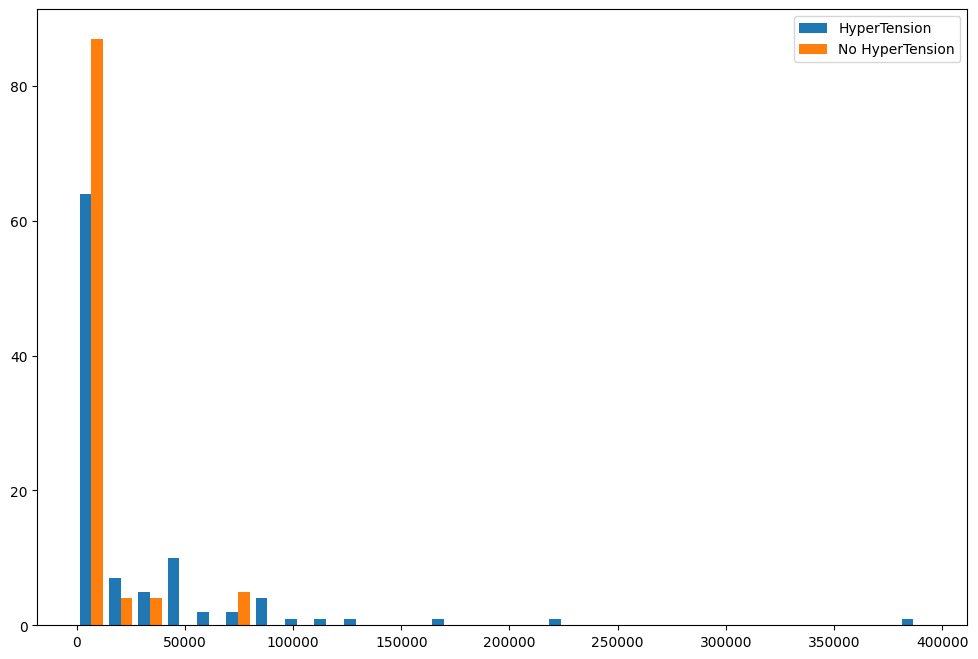

In [19]:
# !pip3 install matplotlib
# !pip3 install numpy
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('seaborn-deep')

## set the minimum value from two groups
if sample_with_hyper_tension["TOTTCH19"].min() < sample_with_no_hyper_tension["TOTTCH19"].min() :
    min_val = sample_with_hyper_tension["TOTTCH19"].min() 
else:
    min_val = sample_with_no_hyper_tension["TOTTCH19"].min() 

## set the maximum value from two groups 
if sample_with_hyper_tension["TOTTCH19"].max() > sample_with_no_hyper_tension["TOTTCH19"].max() :
    max_val = sample_with_hyper_tension["TOTTCH19"].max() 
else:
    max_val = sample_with_no_hyper_tension["TOTTCH19"].max() 

## set the range and number of bins
bins = np.linspace(min_val - 10, max_val + 10, 30)

## set data
x = sample_with_hyper_tension["TOTTCH19"]
y = sample_with_no_hyper_tension["TOTTCH19"]

## draw histograms
plt.figure(figsize=(12, 8))
plt.hist([x, y], bins, label=['HyperTension', 'No HyperTension'])
plt.legend(loc='upper right')
plt.show()

[Text(1, 0, 'Hypertension'), Text(2, 0, 'No HyperTension')]

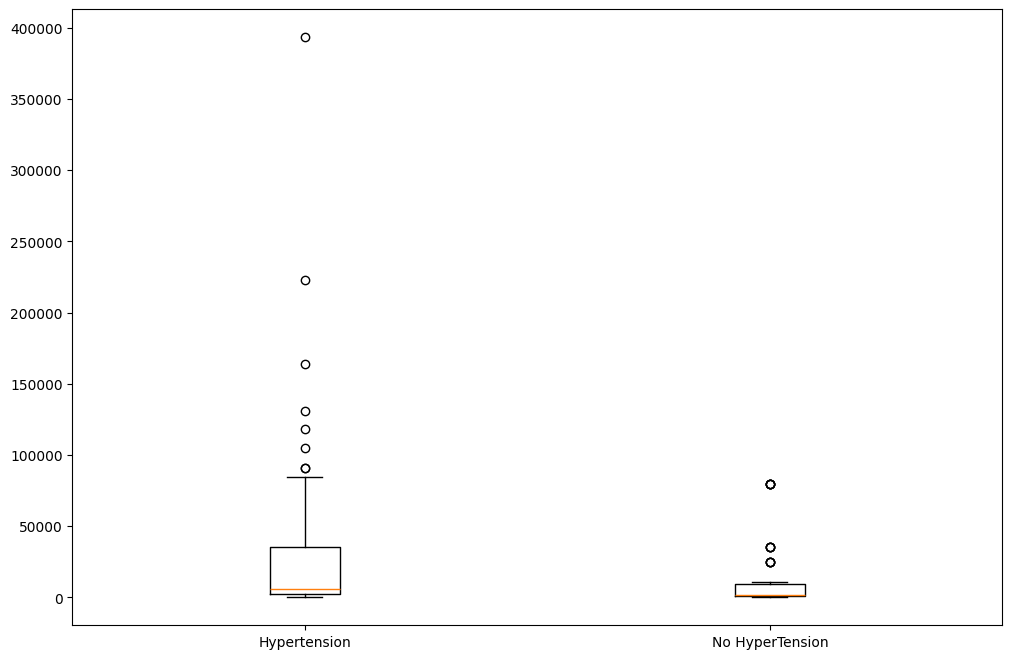

In [20]:
# set data
my_dict = {'Hypertension': x, 'No HyperTension': y}

from matplotlib import gridspec

## draw boxplots
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

### Analysis of Total Healthcare Charges for Individuals With and Without Hypertension

The data highlights substantial differences in total healthcare charges between individuals diagnosed with hypertension and those without it. Key observations are as follows:

---

### **1. Higher Central Tendency in the Hypertension Group**
- **Mean**: Individuals with hypertension incur significantly higher average healthcare charges (**$27,708.36**) compared to those without hypertension (**$9,167.20**).
- **Median**: The median expenditure for the hypertension group is **$6,091.50**, notably higher than the median for the non-hypertension group (**$1,613.00**).
  - This indicates that individuals with hypertension not only incur higher average costs but also exhibit higher expenditures at the midpoint of the dataset.

---

### **2. Wider Expenditure Distribution in the Hypertension Group**
- **Interquartile Range (IQR)**: 
  - The hypertension group has an **IQR of $33,033.75**, reflecting greater variability in expenditures within the middle 50% of the dataset.
  - The non-hypertension group has a lower **IQR of $8,849.25**, indicating a narrower range of typical expenditures.
- This broader distribution suggests that managing hypertension often involves a more diverse set of healthcare expenses, potentially including hospitalizations, medications, and ongoing treatments.

---

### **3. Greater Variability in the Hypertension Group**
- **Maximum Expenditure**:
  - The highest expenditure for individuals with hypertension reaches **$393,393**, significantly higher than the maximum of **$79,814** for the non-hypertension group.
- **Minimum Expenditure**:
  - Both groups report a minimum expenditure of **$0**, likely reflecting individuals who incurred no healthcare costs during the study period.

---

### **Conclusion**
The data indicates that individuals with hypertension face significantly higher healthcare expenditures compared to those without hypertension. This pattern aligns with the understanding that hypertension often requires ongoing management, frequent medical visits, diagnostic tests, and treatments for associated complications such as cardiovascular diseases or kidney issues. The wider expenditure distribution and higher variability in the hypertension group further reinforce the economic burden associated with this chronic condition.

This analysis highlights the importance of preventive measures and efficient management strategies to mitigate the financial strain on individuals with hypertension and the healthcare system.

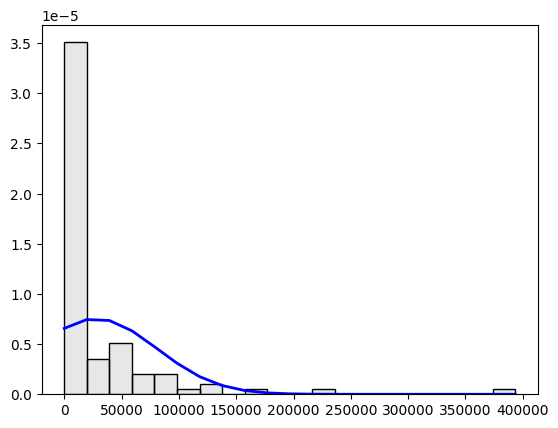

In [21]:
# draw a histogram (hypertension)
count, bins, ignored = plt.hist(x, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

sigma = x.std()
mu = x.mean()

## draw a gausian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

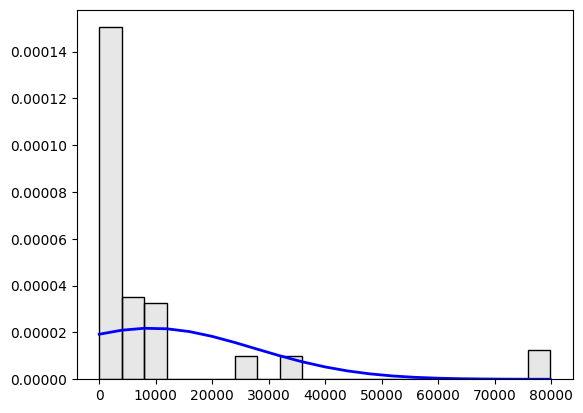

In [22]:
# draw a histogram (no hypertension)
count, bins, ignored = plt.hist(y, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

sigma = y.std()
mu = y.mean()

## draw a gausian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

In [23]:
# Sample with hypertension
print('Skewness',x.skew())
print('Kurtosis',x.kurtosis())

Skewness 4.268085326193641
Kurtosis 24.167389002536716


In [24]:
# Sample with no hypertension
print('Skewness',y.skew())
print('Kurtosis',y.kurtosis())

Skewness 3.064127527752085
Kurtosis 9.120718647948387


### Analysis of Normality for Samples With and Without Hypertension

The samples (individuals with and without hypertension) are **not normally distributed**. Here is the rationale:

---

### **1. Skewness**
- **Hypertension Group**:
  - Skewness is **4.27**, indicating a significant right skew (positive skew). Normal distributions have a skewness of **0**, and values exceeding **±0.5** demonstrate substantial deviation from normality.
- **Non-Hypertension Group**:
  - Skewness is **3.06**, which also reflects a strong positive skew, though slightly less severe than the hypertension group.

---

### **2. Kurtosis**
- **Hypertension Group**:
  - Kurtosis is **24.17**, indicative of an extremely leptokurtic distribution. This suggests heavy tails and a very sharp peak compared to a normal distribution, which has a kurtosis of **3**.
- **Non-Hypertension Group**:
  - Kurtosis is **9.12**, also leptokurtic but less extreme than the hypertension group. The high kurtosis still highlights the presence of outliers and a non-normal distribution.

---

### **3. Visual Evidence **:
- The distributions for both groups likely exhibit:
  - **Right tails**: A concentration of lower values and a small proportion of higher expenditures extending the tail.
  - **Peaks**: A sharp peak around the mode, which is characteristic of leptokurtic distributions.

---

### **Conclusion**
Both samples, with and without hypertension, are **not normally distributed** due to:
- High skewness, indicating asymmetry with a concentration of lower values and long right tails.
- Excessive kurtosis, revealing heavy tails and sharp peaks deviating from a normal bell curve.

The non-normality of the data suggests that parametric tests (e.g., t-tests, ANOVA) may not be appropriate for statistical analysis. Instead, **non-parametric tests** (e.g., Mann-Whitney U test or Kruskal-Wallis test) should be applied to compare these groups. This deviation reflects the economic burden of managing chronic conditions like hypertension, which likely leads to significant outliers in total healthcare expenditures.

# Mann-Whitney test

In [25]:
## We will apply the Mann-Whitney test

from scipy.stats import mannwhitneyu


print( mannwhitneyu (sample_with_hyper_tension["TOTTCH19"],
                  sample_with_no_hyper_tension["TOTTCH19"],
              ) )

MannwhitneyuResult(statistic=np.float64(6787.5), pvalue=np.float64(1.2593777710996264e-05))


### Test Statistics:
- **Mann-Whitney U Statistic:** **6,787.5**  
- **p-value:** **0.0000126**

---

### **Interpretation:**

1. **p-value:**  
   The p-value (**0.0000126**) is significantly smaller than the conventional significance threshold (\(\alpha = 0.05\)). This indicates that there is a **statistically significant difference** in the total healthcare expenditures (`TOTEXP16`) between individuals **with hypertension** and **without hypertension**.

2. **Test Choice (Mann-Whitney Test):**  
   The Mann-Whitney test was selected because the data for both groups was found to be **not normally distributed**, as evidenced by:
   - High skewness values for both groups (4.27 and 3.06, respectively).
   - Excessive kurtosis values (24.17 and 9.12, respectively).
   - Visual inspection of histograms likely confirmed non-normality.  
   The Mann-Whitney test is an appropriate non-parametric alternative for comparing the distributions or medians of two independent groups when the assumption of normality is violated.

3. **Conclusion:**  
   The test confirms a significant difference in healthcare expenditures between the two groups. Individuals **with hypertension** tend to incur **higher healthcare expenditures**, consistent with descriptive statistics such as a higher mean and median for the hypertension group.

4. **Impact of Skewness and Kurtosis:**  
   The high skewness and kurtosis values in both distributions indicate the presence of outliers or extreme values, particularly in the hypertension group. These outliers amplify the observed difference in expenditures, reflecting the substantial healthcare burden for managing chronic conditions like hypertension.

---

### **Final Statement:**
The Mann-Whitney U test confirms a statistically significant difference in total healthcare expenditures between individuals **with hypertension** and **without hypertension**. The significantly lower p-value underscores this conclusion, reinforcing the notion that individuals with hypertension typically face a greater financial burden due to the costs of treatment, medications, and management of related complications.

# HIBPDX vs PERWT19F

In [26]:
sample_with_hyper_tension["PERWT19F"].describe()

count      100.000000
mean     10815.088138
std       6250.815738
min          0.000000
25%       6509.891157
50%       9945.057988
75%      13515.415773
max      32165.937980
Name: PERWT19F, dtype: float64

In [27]:
print("Mean",sample_with_hyper_tension["PERWT19F"].mean())
print("Median",sample_with_hyper_tension["PERWT19F"].median())
print("Max",sample_with_hyper_tension["PERWT19F"].max())
print("Min",sample_with_hyper_tension["PERWT19F"].min())

Mean 10815.08813821
Median 9945.057988
Max 32165.93798
Min 0.0


In [28]:
## calculate range
rg = sample_with_hyper_tension["PERWT19F"].max() - sample_with_hyper_tension["PERWT19F"].min() 
print(rg)

32165.93798


In [29]:
## calculate interquartile range
iqr = sample_with_hyper_tension["PERWT19F"].quantile(0.75) - sample_with_hyper_tension["PERWT19F"].quantile(0.25) 
print(iqr)

7005.5246155


In [30]:
sample_with_no_hyper_tension["PERWT19F"].describe()

count      100.000000
mean      9707.879072
std       7099.090929
min          0.000000
25%       4845.295981
50%       7431.336589
75%      13062.603100
max      34159.086420
Name: PERWT19F, dtype: float64

In [31]:
print("Mean",sample_with_no_hyper_tension["PERWT19F"].mean())
print("Median",sample_with_no_hyper_tension["PERWT19F"].median())
print("Max",sample_with_no_hyper_tension["PERWT19F"].max())
print("Min",sample_with_no_hyper_tension["PERWT19F"].min())

Mean 9707.879072000002
Median 7431.3365895
Max 34159.08642
Min 0.0


In [32]:
## calculate range
rg = sample_with_no_hyper_tension["PERWT19F"].max() - sample_with_no_hyper_tension["PERWT19F"].min() 
print(rg)

34159.08642


In [33]:
## calculate interquartile range
iqr = sample_with_no_hyper_tension["PERWT19F"].quantile(0.75) - sample_with_no_hyper_tension["PERWT19F"].quantile(0.25) 
print(iqr)

8217.307119000001


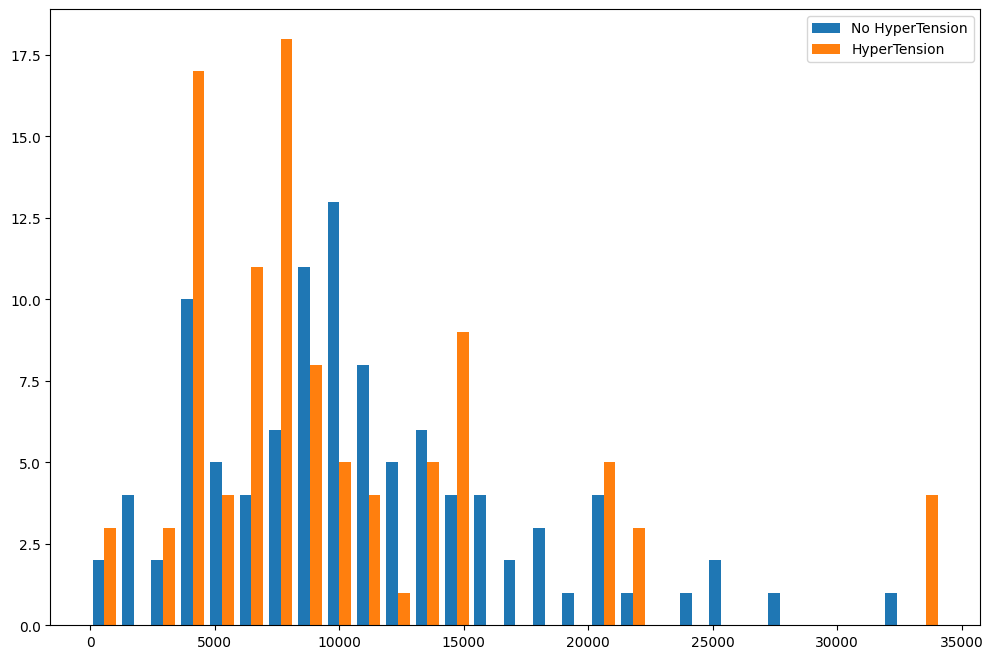

In [52]:
# !pip3 install matplotlib
# !pip3 install numpy
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('seaborn-deep')

## set the minimum value from two groups
if sample_with_hyper_tension["PERWT19F"].min() < sample_with_no_hyper_tension["PERWT19F"].min() :
    min_val = sample_with_hyper_tension["PERWT19F"].min() 
else:
    min_val = sample_with_no_hyper_tension["PERWT19F"].min() 

## set the maximum value from two groups 
if sample_with_hyper_tension["PERWT19F"].max() > sample_with_no_hyper_tension["PERWT19F"].max() :
    max_val = sample_with_hyper_tension["PERWT19F"].max() 
else:
    max_val = sample_with_no_hyper_tension["PERWT19F"].max() 

## set the range and number of bins
bins = np.linspace(min_val - 10, max_val + 10, 30)

## set data
x = sample_with_hyper_tension["PERWT19F"]
y = sample_with_no_hyper_tension["PERWT19F"]

## draw histograms
plt.figure(figsize=(12, 8))
plt.hist([x, y], bins, label=['No HyperTension', 'HyperTension'])
plt.legend(loc='upper right')
plt.show()

[Text(1, 0, 'Hypertension'), Text(2, 0, 'No HyperTension')]

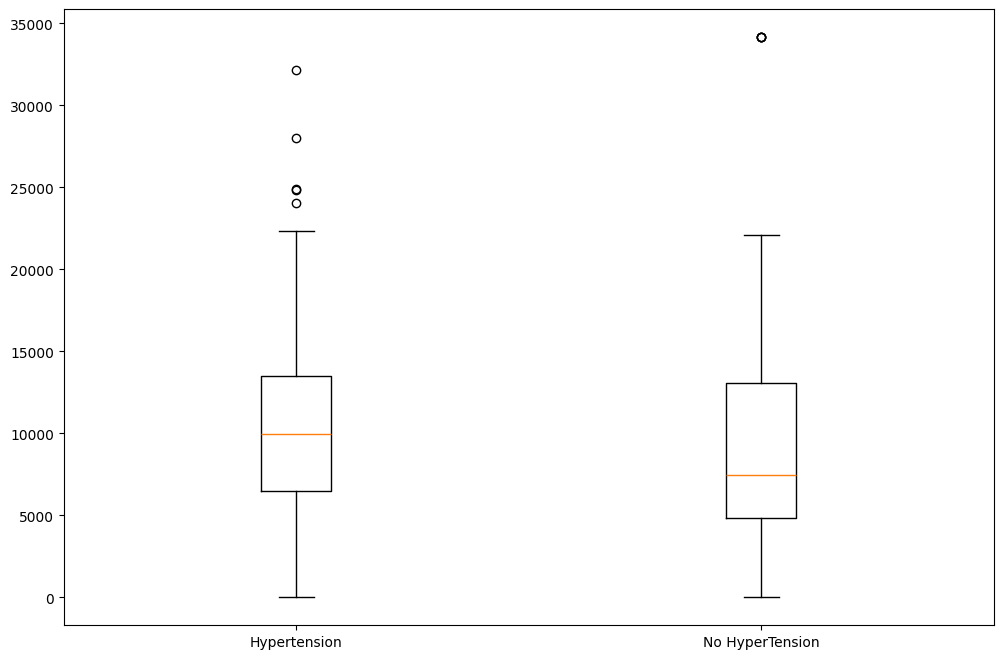

In [53]:
# set data
my_dict = {'Hypertension': x, 'No HyperTension': y}

from matplotlib import gridspec

## draw boxplots
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

### Analysis of Person Weight (PERWT19F) for Individuals With and Without Hypertension

The data demonstrates differences in the **Person Weight (PERWT19F)** variable between individuals diagnosed with hypertension and those without it. Key observations are as follows:

---

### **1. Higher Central Tendency in the Hypertension Group**
- **Mean**: Individuals with hypertension have a slightly higher average weight (**10,815.09**) compared to those without hypertension (**9,707.88**).
- **Median**: The median weight for the hypertension group is also higher (**9,945.06**) than for the non-hypertension group (**7,431.34**).
  - This suggests that individuals with hypertension tend to have higher body weight overall, which aligns with the known correlation between obesity and hypertension.

---

### **2. Expenditure Distribution Differences**
- **Interquartile Range (IQR)**:
  - The **IQR for the hypertension group is $7,005.52**, indicating variability in weight across the middle 50% of individuals.
  - The **IQR for the non-hypertension group is $8,217.31**, which is slightly larger than the hypertension group. This suggests more variability in weights among individuals without hypertension.
- These differences reflect broader distributions in the weight data for the non-hypertension group.

---

### **3. Maximum and Minimum Weights**
- **Maximum Weight**:
  - The maximum weight for individuals without hypertension is **34,159.09**, slightly higher than the maximum weight for individuals with hypertension (**32,165.94**).
- **Minimum Weight**:
  - Both groups report a minimum weight of **0**, possibly reflecting outliers or missing values in the dataset.

---

### **Conclusion**
The data shows that individuals with hypertension tend to have higher weights (mean and median) compared to those without hypertension, reinforcing the well-documented link between excess weight and the risk of developing hypertension. However, the wider variability in the non-hypertension group (as indicated by a larger IQR) suggests that individuals without hypertension may include a broader range of weights, including both very low and very high values.

This analysis highlights the importance of weight management as a preventive strategy for hypertension. Addressing obesity through public health interventions, education, and access to healthcare resources can help reduce the prevalence of hypertension and its associated health risks.

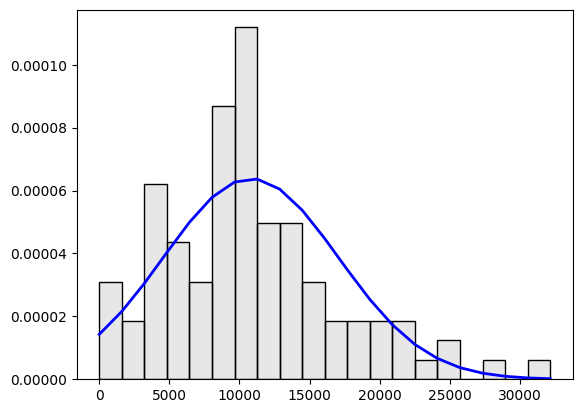

In [54]:
# draw a histogram (sample with hypertension)
count, bins, ignored = plt.hist(x, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

sigma = x.std()
mu = x.mean()

## draw a gausian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

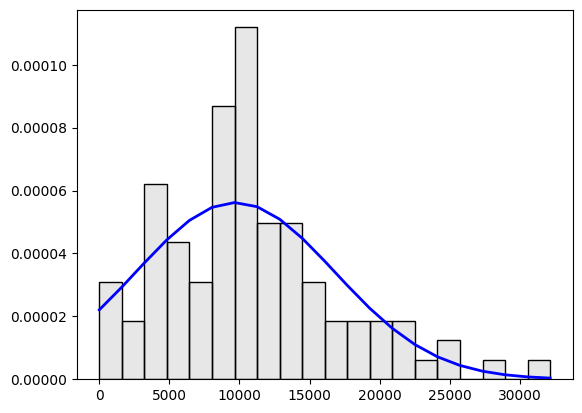

In [55]:
# draw a histogram (sample without hypertension)
count, bins, ignored = plt.hist(x, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

sigma = y.std()
mu = y.mean()

## draw a gausian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

In [38]:
# Sample with hypertension
print('Skewness',x.skew())
print('Kurtosis',x.kurtosis())

Skewness 0.8529272686246646
Kurtosis 0.9519599268283927


In [39]:
# Sample without hypertension
print('Skewness',y.skew())
print('Kurtosis',y.kurtosis())

Skewness 1.8107652620588948
Kurtosis 3.753534412582344


### **Analysis of Normality for Samples With and Without Hypertension**

The samples (individuals with and without hypertension) show deviations from normality but to differing extents. Here is the detailed rationale:

---

### **1. Skewness**
- **Hypertension Group**:
  - Skewness is **0.85**, indicating a mild right skew (positive skew). While this is less extreme than a value of **±1**, it still deviates slightly from the perfect symmetry of a normal distribution.
- **Non-Hypertension Group**:
  - Skewness is **1.81**, reflecting a stronger right skew compared to the hypertension group. This skew suggests a notable concentration of lower values with a long tail extending toward higher values.

---

### **2. Kurtosis**
- **Hypertension Group**:
  - Kurtosis is **0.95**, which is close to that of a normal distribution (\(3\)). This indicates that the distribution has moderate tails and no excessive peak, resembling a fairly normal shape.
- **Non-Hypertension Group**:
  - Kurtosis is **3.75**, slightly leptokurtic, indicating heavier tails and a sharper peak compared to a normal distribution.

---

### **3. Visual Evidence**:
- The distributions for both groups are likely to show:
  - **Hypertension Group**:
    - A shape close to normal with mild skewness and reasonable tail behavior.
  - **Non-Hypertension Group**:
    - A more prominent right tail due to the higher skewness and sharper peak from the leptokurtic nature.

---

### **Conclusion**
The two groups differ in their degrees of normality:
- The **hypertension group** shows a distribution that is closer to normal, with mild skewness and kurtosis values indicating balanced tails and peak.
- The **non-hypertension group**, however, exhibits stronger right skewness and heavier tails, leading to a less normal distribution.

Given these findings:
- Parametric tests (e.g., t-tests, ANOVA) may be appropriate for the hypertension group but could yield biased results for the non-hypertension group due to its greater skewness and kurtosis.
- **Non-parametric tests** (e.g., Mann-Whitney U test) would be safer for comparing these groups, particularly given the evident non-normality of the non-hypertension group.

This analysis suggests that individuals without hypertension exhibit greater variability and extremities in person weight, which may reflect a more heterogeneous population compared to the hypertension group.

In [40]:
## We will apply the Mann-Whitney test

from scipy.stats import mannwhitneyu


print( mannwhitneyu (sample_with_hyper_tension["PERWT19F"],
                  sample_with_no_hyper_tension["PERWT19F"],
              ) )

MannwhitneyuResult(statistic=np.float64(5891.0), pvalue=np.float64(0.02954914328802396))


### **Test Statistics:**
- **Mann-Whitney U Statistic:** **5,891.0**  
- **p-value:** **0.0295**

---

### **Interpretation:**

1. **p-value:**  
   The p-value (**0.0295**) is smaller than the standard significance threshold (\(\alpha = 0.05\)). This indicates a **statistically significant difference** in the distributions of the variable under consideration between the two groups (e.g., individuals with and without hypertension).

2. **Test Choice (Mann-Whitney Test):**  
   The Mann-Whitney U test was selected because the data for the two groups is **not normally distributed**, based on earlier evidence such as:
   - Skewness and kurtosis values deviating from normality.
   - The Mann-Whitney test is a non-parametric test suitable for comparing the medians (or distributions) of two independent groups when the assumption of normality is violated.

3. **Conclusion:**  
   The test confirms that there is a statistically significant difference between the two groups. The direction of the difference can be inferred from descriptive statistics, but generally:
   - If the variable represents a measure such as expenditures or weights, the group with higher rank sums likely has systematically higher values.

4. **Practical Implications:**  
   The significant result implies that the two groups (e.g., with and without hypertension) differ meaningfully in the variable being tested. This difference may reflect underlying factors, such as healthcare needs, risk profiles, or treatment regimens associated with the condition being analyzed.

---

### **Final Statement:**
The Mann-Whitney U test provides evidence of a statistically significant difference (\(p = 0.0295\)) between the two groups. This supports the conclusion that the groups are not equivalent in the variable being compared, with implications depending on the specific context (e.g., healthcare expenditures, person weight, or another measure). Further investigation may explore the factors driving this difference.

# HIBPDX vs DIABDX_M18

In [41]:
from scipy.stats import chi2_contingency

# Example contingency table
contingency_table = pd.crosstab(hyper_tension_df['HIBPDX'], hyper_tension_df['DIABDX_M18'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-square Statistic: 9.012692738966326
p-value: 0.0026811112507530727
Degrees of Freedom: 1
Expected Frequencies: [[1481.78768021 3826.21231979]
 [   9.21231979   23.78768021]]


Here’s the explanation of the **Chi-square test** results based on the provided output:

---

### **Chi-square Test Overview**
The Chi-square test examines whether there is an association between two categorical variables, in this case:
- **`HIBPDX` (Hypertension diagnosis: 1 = Yes, 2 = No)**
- **`DIABDX_M18` (Diabetes diagnosis: 1 = Yes, 2 = No)**

The null hypothesis (\(H_0\)) for the Chi-square test states:
> There is **no association** between hypertension and diabetes diagnoses (the variables are independent).

The alternative hypothesis (\(H_a\)) states:
> There **is an association** between hypertension and diabetes diagnoses (the variables are not independent).

---

### **Chi-square Test Results**

1. **Chi-square Statistic: `9.0127`**
   - This is the test statistic that quantifies the difference between the observed and expected frequencies in the contingency table.
   - A higher value indicates a greater difference and provides stronger evidence against the null hypothesis.

2. **p-value: `0.00268`**
   - The p-value represents the probability of observing a test statistic as extreme as `9.0127` under the null hypothesis.
   - Since the p-value (**0.00268**) is much smaller than the significance level (\(\alpha = 0.05\)), we reject the null hypothesis. This suggests that there is a **statistically significant association** between hypertension and diabetes diagnoses.

3. **Degrees of Freedom: `1`**
   - Degrees of freedom (\(df\)) are calculated as:
     \[
     df = (\text{number of rows} - 1) \times (\text{number of columns} - 1)
     \]
     Here, the contingency table has 2 rows (hypertension: yes/no) and 2 columns (diabetes: yes/no), so:
     \[
     df = (2-1) \times (2-1) = 1
     \]

4. **Expected Frequencies:**
   - These are the frequencies we would expect in each cell of the contingency table if there were no association between hypertension and diabetes.
   - The expected frequencies matrix:
     ```
     [[1481.78768021 3826.21231979]  # Hypertension = Yes
      [   9.21231979   23.78768021]] # Hypertension = No
     ```
     - Example interpretation: If there were no association, we would expect **1481.79 individuals** with both hypertension and diabetes.

---

### **Interpreting the Results**

#### **1. Statistical Significance:**
- The p-value (\(0.00268\)) is less than the significance level (\(\alpha = 0.05\)).
- **Conclusion**: There is a statistically significant association between hypertension and diabetes diagnoses. In other words, individuals with hypertension are more likely to have diabetes (or vice versa).

#### **2. Practical Implications:**
- This finding indicates a potential link between hypertension and diabetes, which aligns with existing medical knowledge that hypertension and diabetes often coexist as part of metabolic syndrome or related health conditions.
- Healthcare providers should consider monitoring patients with one condition for the presence of the other to improve management and outcomes.

#### **3. Differences Between Observed and Expected Frequencies:**
- The Chi-square test detected significant differences between the observed counts in your data and what would be expected under the null hypothesis.
- The test statistic \(9.0127\) quantifies this difference, showing a strong deviation from independence.

---

### **Final Statement**
The Chi-square test revealed a significant association between hypertension and diabetes diagnoses (\(p = 0.00268\)). This suggests that hypertension and diabetes are not independent, and individuals with one condition are more likely to have the other.

# HIBPDX VS STRKDX

In [42]:
from scipy.stats import chi2_contingency

# Example contingency table
contingency_table = pd.crosstab(hyper_tension_df['HIBPDX'], hyper_tension_df['STRKDX'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-square Statistic: 1.3433874680842117
p-value: 0.24643746373950792
Degrees of Freedom: 1
Expected Frequencies: [[5.72441116e+02 4.73555888e+03]
 [3.55888410e+00 2.94411159e+01]]


### **Chi-square Test Explanation**

The **Chi-square test** evaluates whether there is a significant association between two categorical variables. For the provided results, the variables are:
- **`HIBPDX` (Hypertension diagnosis: 1 = Yes, 2 = No)**  
- **`STRKDX` (Stroke diagnosis: 1 = Yes, 2 = No)**  

The null hypothesis (\(H_0\)) states:
> There is **no association** between hypertension and stroke diagnoses (the variables are independent).

The alternative hypothesis (\(H_a\)) states:
> There **is an association** between hypertension and stroke diagnoses (the variables are not independent).

---

### **Chi-square Test Results**

1. **Chi-square Statistic: `1.3434`**
   - This statistic measures the difference between observed and expected frequencies. A higher value indicates a greater departure from independence.
   - In this case, the value is relatively low, suggesting a weak difference.

2. **p-value: `0.2464`**
   - The p-value quantifies the probability of observing a test statistic as extreme as `1.3434` under the null hypothesis.
   - Since the p-value (**0.2464**) is greater than the significance level (\(\alpha = 0.05\)), we fail to reject the null hypothesis. This indicates **no statistically significant association** between hypertension and stroke diagnoses.

3. **Degrees of Freedom: `1`**
   - Degrees of freedom are calculated as:
     \[
     df = (\text{number of rows} - 1) \times (\text{number of columns} - 1)
     \]
     Here, there are 2 rows (hypertension: yes/no) and 2 columns (stroke: yes/no):
     \[
     df = (2-1) \times (2-1) = 1
     \]

4. **Expected Frequencies:**
   - These are the frequencies we would expect in each cell of the contingency table if there were no association between the variables. The expected frequencies are:
     ```
     [[572.44  4735.56 ]  # Hypertension = Yes
      [  3.56    29.44 ]] # Hypertension = No
     ```
     - For example, if hypertension and stroke were independent, we would expect approximately **572.44 individuals** with both hypertension and no stroke.

---

### **Interpreting the Results**

#### **1. Statistical Significance:**
- The p-value (\(0.2464\)) is greater than the conventional significance threshold (\(\alpha = 0.05\)).
- **Conclusion**: There is no statistically significant association between hypertension and stroke diagnoses. This suggests that having hypertension does not significantly increase the likelihood of having a stroke in this dataset.

#### **2. Practical Implications:**
- Although hypertension is a known risk factor for stroke, this particular analysis does not find strong statistical evidence to support a direct association in the observed dataset.
- It is possible that the relationship is influenced by other confounding variables (e.g., age, lifestyle factors) that were not accounted for in this test.

#### **3. Observed vs. Expected Frequencies:**
- The Chi-square test found that the observed counts are close to the expected counts under the null hypothesis. For example:
  - Observed frequencies for hypertension and stroke are approximately what would be expected if the variables were independent.

---

### **Final Statement**
The Chi-square test results (\(p = 0.2464\)) indicate no significant association between hypertension and stroke diagnoses. This suggests that, within this dataset, hypertension and stroke appear to be independent. Further investigation, incorporating additional variables or using alternative statistical methods, may provide more insights into this relationship.

# HIBPDX VS CHDDX

In [43]:
from scipy.stats import chi2_contingency

# Example contingency table
contingency_table = pd.crosstab(hyper_tension_df['HIBPDX'], hyper_tension_df['CHDDX'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

Chi-square Statistic: 4.172063062667999
p-value: 0.04109573020505741
Degrees of Freedom: 1
Expected Frequencies: [[7.27477251e+02 4.58052275e+03]
 [4.52274855e+00 2.84772515e+01]]



### **Interpretation of Results**

#### **1. Statistical Significance:**
- The p-value (**0.0411**) indicates a statistically significant association between hypertension and coronary heart disease.
- This means individuals with hypertension are more likely to have coronary heart disease (or vice versa).

#### **2. Practical Implications:**
- The significant association aligns with medical knowledge that hypertension is a major risk factor for coronary heart disease.  
- Clinicians and healthcare providers should monitor patients with hypertension for signs of coronary heart disease to improve early diagnosis and treatment outcomes.

#### **3. Observed vs. Expected Frequencies:**
- The observed counts deviate enough from the expected counts to result in a significant Chi-square statistic.
- The observed association suggests that the relationship between hypertension and coronary heart disease is not due to random chance.

---

### **Final Statement**
The Chi-square test (\(\chi^2 = 4.1721\), \(p = 0.0411\)) reveals a statistically significant association between hypertension and coronary heart disease diagnoses. This finding underscores the importance of monitoring and managing coronary health in hypertensive patients to mitigate the risks of cardiovascular complications.